https://kernc.github.io/backtesting.py/doc/examples/Strategies%20Library.html
https://kernc.github.io/backtesting.py/doc/examples/Quick%20Start%20User%20Guide.html

## Seems like volatility predicts effetiveness for this type of trading

In [196]:
%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

In [197]:
import pandas as pd
import os


# import backtesting and yfinance

from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA
import yfinance as yf

# define backtesting strategy...simple SMA crossover
# see https://kernc.github.io/backtesting.py/doc/examples/Quick%20Start%20User%20Guide.html

# more strategies avalable!!!
# https://kernc.github.io/backtesting.py/doc/examples/Strategies%20Library.html

class SmaCross(Strategy):
    n1 = 10
    n2 = 20

    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()
            
            
# generate dataset compatible with backtesting strategy

def get_data(tickerSymbol, startdate='2010-1-1', enddate='2020-7-7'):
    # tickerSymbol = "NVTA"
    tickerData = yf.Ticker(tickerSymbol)
    tdf = tickerData.history(start=startdate, end=enddate).drop(['Dividends', 'Stock Splits'], axis=1)
    tdf.index.name = None
    return tdf

# run the backtest and plot the results

def backtest_results(ticker, start, end, quiet=False):
    tdf = get_data(ticker,startdate=start, enddate=end)
    bt = Backtest(tdf, SmaCross, cash=10000, commission=.002)
    output = bt.run()
    if not quiet:
        print(output)
        bt.plot()
    return output

In [151]:
stdev = yf.Ticker("NVTA").history(start=startdate, end=enddate).drop(['Dividends', 'Stock Splits'], axis=1).Close.std()
print(stdev)

4.361334343397897


## Get some of the top 'momentum' opportunitues

#### `xdays = days since the 50 sma crossed the 250 sma`

> should probably change these windows to be smaller

#### rev_spread is `(high revenue - low revenue)/average revenue` from yfinance data


In [66]:
momentum_stats = "/Users/mingay/coding/aws_mingquant/stocks/momentum_stats.txt"
momdf = pd.read_csv(momentum_stats, sep="\t")
momdf.columns = ['stock', 'xdays', 'rev_spread']
subdf = momdf[(momdf['xdays'] > 0) & (momdf['xdays'] < 20)].sort_values('rev_spread', ascending=False)
subdf.head()

,stock,xdays,rev_spread
190,UBER,4,0.624138
108,FND,18,0.347752
167,RAMP,4,0.188826
115,AMCR,6,0.139171
27,SFIX,4,0.117945


In [102]:
print([i for i in subdf.stock])

['UBER', 'FND', 'RAMP', 'AMCR', 'SFIX', 'NVTA', 'ORCL', 'UPWK', 'KDP', 'PANW', 'PS']


In [131]:
symbola = pd.read_csv("data/large_cap_volume_leaders.csv").Symbol
symbolb = pd.read_csv("data/nasdaq_volume_leaders.csv").Symbol
symbolc = pd.read_csv("data/mid_cap_volume_leaders.csv").Symbol
symbold = pd.read_csv("data/small_cap_volume.csv").Symbol
symbols = [i for i in set(symbola.append(symbolb).append(symbolc).append(symbold))]
symbols[:5]
# print(len(symbols))

['PLUG', 'NKE', 'CHWY', 'HPP', 'ALK']

In [163]:
masterdf = pd.DataFrame()
startdate='2019-07-01'
enddate='2020-07-07'
# stocks = [i for i in subdf.stock]
for ticker in symbols:
    try:
        results = backtest_results(ticker, startdate, enddate, quiet=True)
        rdf = pd.DataFrame(results).T
        rdf['advantage'] = rdf['Return [%]']/rdf['Buy & Hold Return [%]']
        rdf['symbol'] = ticker
        rdf['stdev'] = yf.Ticker(ticker).history(start=startdate, end=enddate).drop(['Dividends', 'Stock Splits'], axis=1).Close.std()
        rdf['mean'] = yf.Ticker(ticker).history(start=startdate, end=enddate).drop(['Dividends', 'Stock Splits'], axis=1).Close.mean()
        rdf['stdev_mean'] = rdf['stdev']/rdf['mean']
        masterdf = pd.concat([masterdf.copy(), rdf])
    except:
        print("failed for: "+ ticker)
masterdf.to_csv("data/backtest_all_results.txt", sep="\t", index=False)
masterdf.head()

- PBR.A: No data found, symbol may be delisted
failed for: PBR.A
- DOWNLOADED FROM BARCHART.COM AS OF 05-25-2020 05:42PM CDT: No data found, symbol may be delisted
failed for: Downloaded from Barchart.com as of 05-25-2020 05:42pm CDT
- RDS.A: No data found, symbol may be delisted
failed for: RDS.A
- RDS.B: No data found for this date range, symbol may be delisted
failed for: RDS.B
- DOWNLOADED FROM BARCHART.COM AS OF 05-25-2020 05:32PM CDT: No data found, symbol may be delisted
failed for: Downloaded from Barchart.com as of 05-25-2020 05:32pm CDT
- BRK.B: No data found, symbol may be delisted
failed for: BRK.B
failed for: BPY
- DOWNLOADED FROM BARCHART.COM AS OF 05-25-2020 08:22PM CDT: No data found, symbol may be delisted
failed for: Downloaded from Barchart.com as of 05-25-2020 08:22pm CDT
- DOWNLOADED FROM BARCHART.COM AS OF 05-25-2020 11:23PM CDT: No data found, symbol may be delisted
failed for: Downloaded from Barchart.com as of 05-25-2020 11:23pm CDT
failed for: SO


,Start,End,Duration,Exposure [%],Equity Final [$],Equity Peak [$],Return [%],Buy & Hold Return [%],Max. Drawdown [%],Avg. Drawdown [%],...,SQN,Sharpe Ratio,Sortino Ratio,Calmar Ratio,_strategy,advantage,symbol,stdev,mean,stdev_mean
0,2019-07-01,2020-07-06,371 days,76.0108,9063.42,13213,-9.36585,345.536,-74.1389,-25.6569,...,-1.33296,-0.30387,-0.731142,-0.0682762,SmaCross,-0.0271053,PLUG,1.272116,3.587070,0.354639
0,2019-07-01,2020-07-06,371 days,80.0539,9404.06,11205.4,-5.95943,18.256,-31.3725,-7.58248,...,-0.109762,0.00627075,0.00926261,0.00166964,SmaCross,-0.326436,NKE,7.901491,90.909609,0.086916
0,2019-07-01,2020-07-06,371 days,88.6792,5288.04,10377.4,-47.1196,39.584,-57.9019,-29.5398,...,-1.56955,-0.298495,-0.619234,-0.0634638,SmaCross,-1.19037,CHWY,7.539076,32.670195,0.230763
0,2019-07-01,2020-07-06,371 days,86.7925,7437.9,12516.1,-25.621,21.5509,-40.8939,-13.7337,...,-0.877614,-0.210171,-0.316041,-0.0415013,SmaCross,-1.18886,HPP,5.166016,30.727617,0.168123
0,2019-07-01,2020-07-06,371 days,86.5229,4660.55,12586,-53.3945,40.8329,-65.3962,-20.4648,...,-0.843612,-0.207516,-0.265889,-0.068665,SmaCross,-1.30763,ALK,15.664613,54.033633,0.289905


In [192]:
scols = ['symbol', 'advantage', 'Return [%]', 'Buy & Hold Return [%]', '# Trades', 'stdev', 'mean', 'stdev_mean']
sdf = masterdf[scols][(masterdf['advantage'] > 1.5) & (masterdf['advantage'] < 100)]
sdf.sort_values('advantage', ascending=False).head(25)

,symbol,advantage,Return [%],Buy & Hold Return [%],# Trades,stdev,mean,stdev_mean
0,HOME,79.5624,651.782,8.19209,4,2.376507,6.015000,0.395097
0,BBBY,74.5095,95.7002,1.2844,10,3.510162,10.284414,0.341309
0,BE,46.7139,261.389,5.59552,8,2.729376,7.184687,0.379888
0,PINS,39.8636,128.496,3.22339,5,5.394662,22.689687,0.237758
0,RAMP,34.3729,143.704,4.18074,7,6.228559,42.251953,0.147415
0,AMCR,28.3061,38.9534,1.37615,8,0.925235,9.580195,0.096578
0,ON,22.9412,99.3562,4.3309,10,3.415869,19.061328,0.179204
0,AVTR,22.9026,70.8831,3.09498,7,2.182063,16.308945,0.133795
0,QTT,21.175,134.359,6.34518,9,0.921949,3.660859,0.251840
0,MDT,20.3907,46.5999,2.28535,10,9.121492,102.455156,0.089029


# Select Companies with 100 > advantage > 2 

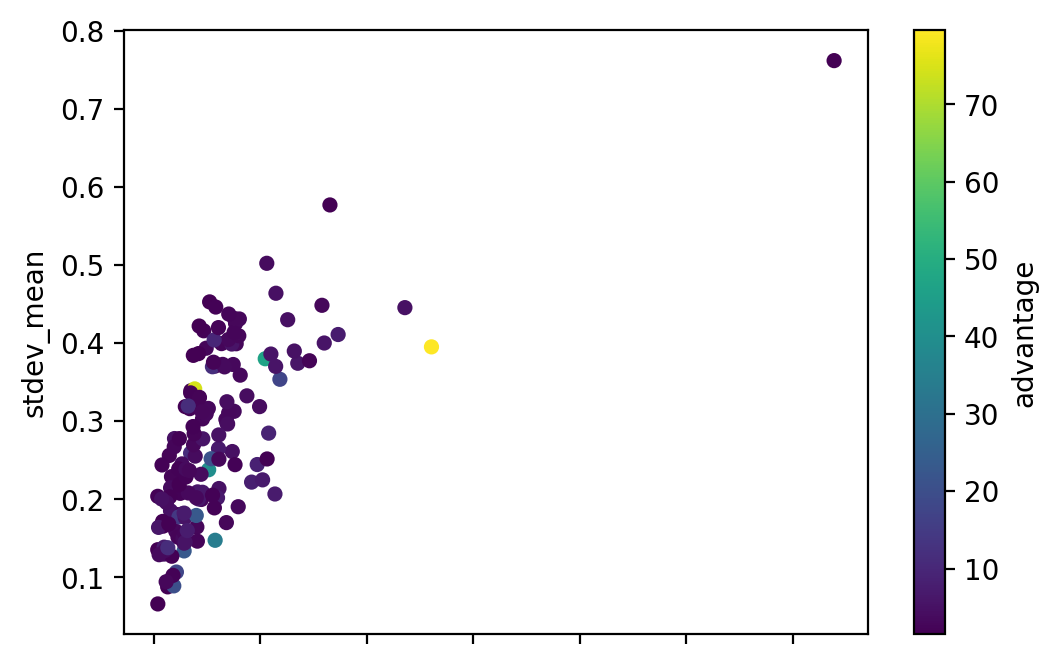

In [195]:
ax2 = sdf.plot.scatter(x='Return [%]',
                      y='stdev_mean',
                      c='advantage',
                      colormap='viridis')

## All companies

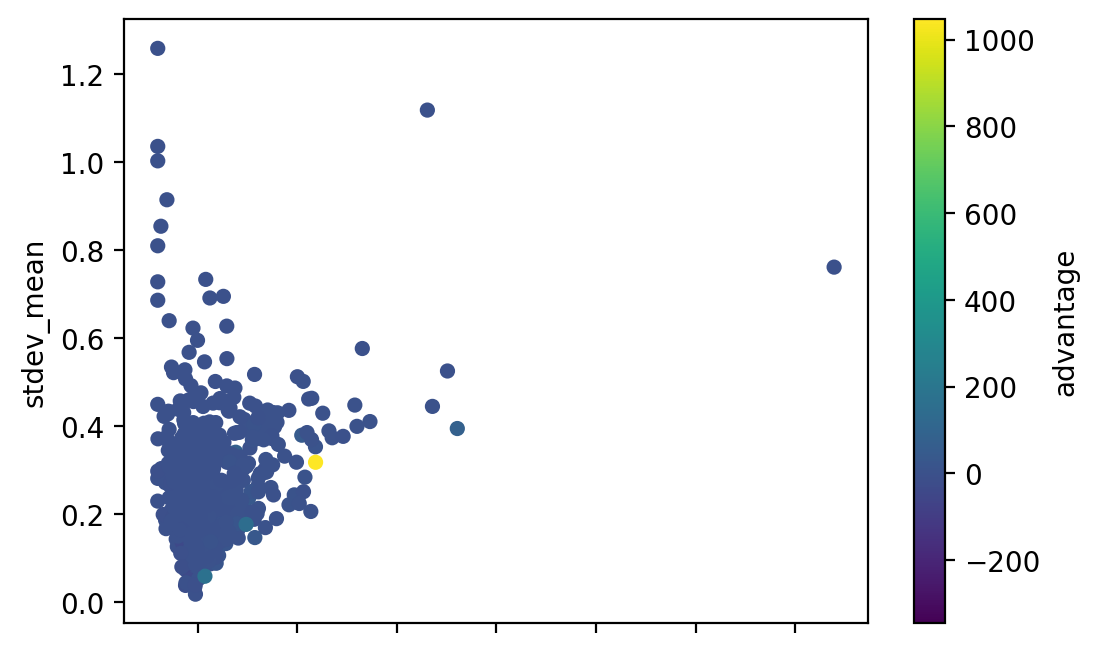

In [189]:
ax1 = masterdf.plot.scatter(x='Return [%]',
                      y='stdev_mean',
                      c='advantage',
                      colormap='viridis')